# Reinforcement Learning
## Assignment 1

To reproduce Average Reward vs Timestep plot for multiple n-armed bandit methods.

### Defining the environment and methods as functions

In [1]:
"""
Environment for the multi-armed bandit problem
"""

import numpy as np 

class bandit_env():
    """
    Initialize the multi-arm bandit environment.
    :params:
    r_mean: takes a list of reward mean
    r_stddev: takes a list of reward standard deviation
    """
    def __init__(self, r_mean, r_stddev):
        if len(r_mean) != len(r_stddev):
            raise ValueError("Reward distribution parameters (mean and variance) must be of the same length")

        if any(r <= 0 for r in r_stddev):
            raise ValueError("Standard deviation in rewards must all be greater than 0")

        self.n = len(r_mean)
        self.r_mean = r_mean
        self.r_stddev = r_stddev

    def pull(self, index_arm):
        """
        Performs the action of pulling the arm/lever of the selected bandit
        :inputs:
        index_arm: the index of the arm/level to be pulled
        :outputs:
        reward: the reward obtained by pulling tht arm (sampled from their corresponding Gaussian distribution)
        """
        reward = self.r_stddev[index_arm] * np.random.randn() + self.r_mean[index_arm]
        return reward

In [2]:
def e_greedy(q, e = 0.09):
  
  # define greedy
  greedy_action = np.argmax(q)
  # define a random action
  random_action = np.random.choice([i for i in range(len(q))])
  # choose one of them, greedy with probability 1-e and random action with probability e
  action_type = np.random.choice(["greedy", "random"], p = [1-e, e])

  if action_type == "greedy":
    return greedy_action
  else: 
    return random_action

# prediction with softmax

def softmax(h):
  sum = np.sum(np.exp(h))
  k = np.empty_like(h)
  for i in range(h.shape[0]):
    k[i] = np.exp(h[i])/sum
  
  return k

### e-Greedy Algorithm

In [3]:
# stores all rewards
e_greedy_reward_history = dict()

# for each value of parameter e
e_list = [1/4, 1/8, 1/16, 1/32, 1/64, 1/128]

# epsilon to remove div by zero errors and argmax bias 
eps = 0.0001


# values for e in e-greedy
# initializing the list
for e in e_list:
  e_greedy_reward_history[e] = []

# run the entire simulation 100 times
for j in range(100):

  # for each value of e
  for e in e_list:

    # initialize array
    q = np.asarray([.0, .0, .0, .0, .0]) 
    
    # add some random values to prevent argmax from choosing index if the values are same
    q = q + eps*np.random.randn(q.shape[0])
    
    # defining them to be one already, to prevent div by zero errors
    k_array = np.asarray([1, 1, 1, 1, 1])

    # storing reward values
    reward_history = []

    # creating the multi-bandit environment
    bandits = bandit_env(np.asarray([2.5, -3.5, 1.0, 5.0, -2.5]), np.asarray([0.33, 1.0, 0.66, 1.98, 1.65]))

    # running over 1000 time steps
    for i in range(1000):

      # action from function
      action = e_greedy(q, e)

      # reward from performing action
      reward = bandits.pull(action)
      
      # action arrray update
      k_array[action] += 1

      # q value update
      q[action] = q[action] + ((1/k_array[action]) * (reward - q[action]))
      
      # append to rewards
      reward_history.append(reward)

    # append for each e
    e_greedy_reward_history[e].append(np.mean(reward_history))

In [4]:
# list for plotting
e_greedy_plot = []
for e in e_list:
  e_greedy_plot.append(np.mean(e_greedy_reward_history[e]))

In [5]:
e_greedy_plot

[3.8384385332649695,
 4.35594373564441,
 4.533685836683327,
 4.349019263002632,
 4.208274834222174,
 3.6787465030287745]

### Greedy with optimistic initial value method

In [ ]:
# values for Q0
greedy_with_optim = [1/4, 1/2, 1, 2, 4, 8, 16]
greedy_opt_reward_history = dict()

# step size is fixed, as per the question
alpha = 0.1

for opt in greedy_with_optim:
  greedy_opt_reward_history[opt] = []

# running the entire simulation 100 times to get better estimates

for i in range(100):

  for opt in greedy_with_optim:

    # initializing q as Q0, and adding noise
    q = np.asarray([1., 1., 1., 1., 1.]) * opt
    q = q + eps*np.random.randn(q.shape[0])

    # setting up env
    bandits = bandit_env(np.asarray([2.5, -3.5, 1.0, 5.0, -2.5]), np.asarray([0.33, 1.0, 0.66, 1.98, 1.65]))

    # defining reward history
    reward_history = []

    for i in range(1000):
      
      # choosing greedy action always
      action = e_greedy(q, e = 0)

      # get reward
      reward = bandits.pull(action)
      
      # update q with step size alpha
      q[action] = q[action] + (alpha * (reward - q[action]))

      # store reward
      reward_history.append(reward)

    # store average reward for each Q0 after 1000 steps
    greedy_opt_reward_history[opt].append(np.mean(reward_history))

In [ ]:
# list for plotting
greedy_opt_plot = []
for opt in greedy_with_optim:
  greedy_opt_plot.append(np.mean(greedy_opt_reward_history[opt]))

In [ ]:
greedy_opt_plot

[2.9615509564190057,
 2.9579077227379975,
 3.6166013357140496,
 3.8911078922325375,
 4.965913375439317,
 4.821758501788775,
 4.700965195033271]

### Upper Confidence Bound

In [ ]:
# prediction with UCB

# parameters to check average reward
c_list = [1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16]

ucb_reward_history = dict()

for c in c_list:
  ucb_reward_history[c] = []

# running algorithm 100 times for better estimates
for i in range(100):

  # for each degree of exploration

  for c in c_list:
    
    # initialize q with additional noise
    q = np.asarray([0., 0., 0., 0., 0.]) + eps*np.random.randn(q.shape[0])
    
    # define action array
    action_array = np.asarray([1, 1, 1, 1, 1])
    
    # set reward history
    reward_history = []

    # starting t from 1 to 1001
    for t in range(1, 1001):

      # get action with the highest action value + "exploring" term
      action = np.argmax(q + c*np.sqrt(np.log(t)/action_array))
      
      # getting reward
      reward = bandits.pull(action)

      # update q with reward
      q[action] = q[action] + ((1/action_array[action]) * (reward - q[action]))
      
      # updating action array
      action_array[action] += 1

      # append rewards
      reward_history.append(reward)

    ucb_reward_history[c].append(np.mean(reward_history))

In [ ]:
# list for plotting
ucb_plot = []
for c in c_list:
  ucb_plot.append(np.mean(ucb_reward_history[c]))

In [ ]:
ucb_plot

[2.7841917322861995,
 2.812975975487179,
 3.064816782751489,
 3.801273382746658,
 3.766413811378433,
 4.928771347180529,
 4.926535879684007,
 4.732664999129756,
 4.185237418752268]

### Gradient Bandit

In [ ]:
# stores all rewards
gradient_bandit_reward_history = dict()

# having step size alpha as parameter
alpha_list = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16]

# initializing the list
for alpha in alpha_list:
  gradient_bandit_reward_history[alpha] = []

for i in range(100):

  for alpha in alpha_list:
    
    # initializing preferences to be zero
    h = np.asarray([0., 0., 0., 0., 0.])
    h = h + eps*np.random.randn(h.shape[0])

    # setting average reward
    avg_reward = eps

    # running for 1000 steps
    for t in range(1000):

      # probability of choosing an action
      pr = softmax(h)

      # using np.random.choice to choose an action based on probabilities
      best_action = np.random.choice(a = [i for i in range(pr.shape[0])], p = pr)

      # getting reward from pull
      reward = bandits.pull(best_action)

      # updating h based on action chosen (gradient ascent)

      for i in range(h.shape[0]):

        if i == best_action:

          h[i] = h[i] + alpha*(reward - avg_reward)*(1 - pr[best_action])
        
        else:

          h[i] = h[i] - alpha*(reward - avg_reward) * pr[i]
        
      
      # calculating average reward at each time step
      avg_reward = (avg_reward * t + reward)/(t+1)

    gradient_bandit_reward_history[alpha].append(avg_reward)

In [ ]:
# list for plotting
gradient_bandit_plot = []
for alpha in alpha_list:
  gradient_bandit_plot.append(np.mean(gradient_bandit_reward_history[alpha]))

In [ ]:
gradient_bandit_plot

[4.68958026673196,
 4.831094377830696,
 4.877241024502552,
 4.746833477642355,
 4.665328450554865,
 4.206685146787595,
 4.038448093476908,
 3.3014538182293567,
 2.92783290777183,
 2.9887367846212523]

### Plotting

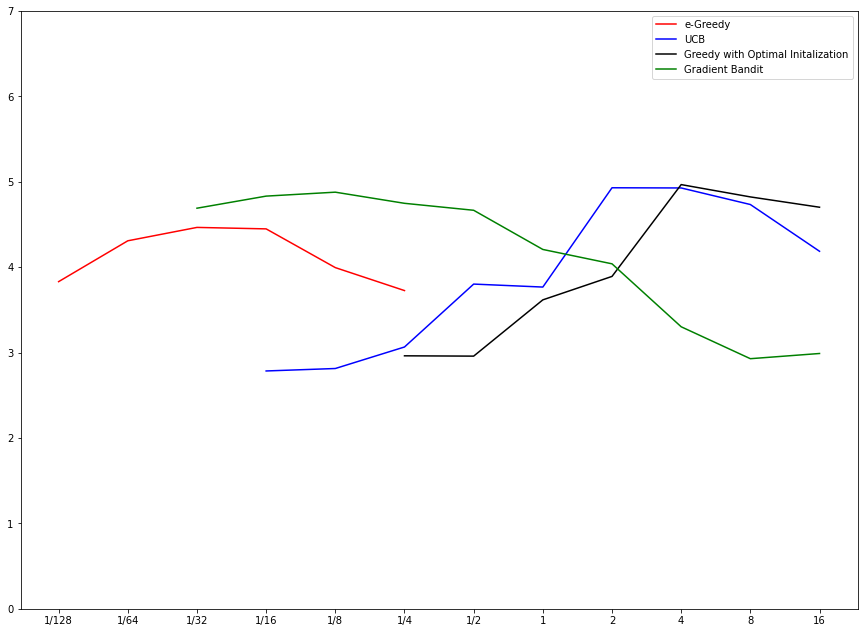

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 11))
plt.plot([0, 1, 2, 3, 4, 5], e_greedy_plot, label = "e-Greedy", color = "red")
plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 11], ucb_plot, label = "UCB", color = "blue")
plt.plot([5, 6, 7, 8, 9, 10, 11], greedy_opt_plot, label = "Greedy with Optimal Initalization", color = "black")
plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], gradient_bandit_plot, label = "Gradient Bandit", color = "green")
plt.ylim(0, 7)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ["1/128", "1/64", "1/32", "1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", "16"])
plt.legend()
plt.show()